# Q2 Email Classification

In [1]:
import pandas as pd

# Data Preprocessing

In [2]:
spam_data = pd.read_csv('spambase.csv')

In [3]:
spam_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, KFold,train_test_split,cross_val_predict
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import numpy as np


In [6]:
X = spam_data.drop(['spam'], axis=1)
y = spam_data['spam']

3683    0
4412    0
2584    0
69      1
1844    0
Name: spam, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


In [40]:
X_train_nnorm, X_test_nnorm, y_train_nnorm, y_test_nnorm = train_test_split(X, y, test_size=0.2, random_state=42)

Have made two sets of data -
1. For non normalised set to explore the impact of non normalized data in prediction
2. normalised data to explore the impact of such data in prediction

In [9]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
}

param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
}

In [11]:
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
ada = AdaBoostClassifier()

In [12]:
models = {
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9],'weights': ['uniform', 'distance'],'p': [1, 2]}),
    'Decision Tree': (DecisionTreeClassifier(criterion='entropy'), {'max_depth': [1,2,3,4,5,6], 'min_samples_split': [1,2,3,4,5,6,7,8],
                                                                  'min_samples_leaf': [1,2,4]}),
    'Logistic Regression': (LogisticRegression(max_iter=1000), {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}),
    'SVM': (SVC(probability=True), {'C': [0.1, 1, 10], 'kernel': ['rbf', 'poly'], 'gamma': [0.01, 0.1, 1]}),
    'Random Forest': (rf, param_grid_rf),
    'Gradient Boosting': (gb, param_grid_gb),
    'XGBoost': (xgb, param_grid_xgb),
    'AdaBoost': (ada, param_grid_ada),
    
}


In [12]:

# Function to calculate lift ratio
def calculate_lift(y_true, y_pred, num_percentiles=10):
    sorted_indices = np.argsort(y_pred)[::-1]
    n = len(y_true)
    step = n // num_percentiles
    lift_values = []

    for i in range(num_percentiles):
        start = i * step
        end = min((i + 1) * step, n)
        actual_positives = np.sum(y_true[sorted_indices[start:end]])
        lift = actual_positives / ((i + 1) * step)
        lift_values.append(lift)

    return np.mean(lift_values)

In [13]:
best_model_name = None
best_model = None
best_balanced_accuracy = 0
best_hyperparams = None
model_performance_normalized = {}


# Nested CV Cross Validation to Find the Best Model Using Balanced Accuracy on normalized data

Balanced accuracy score for KNN is :  [0.92150387 0.91706928 0.90904034 0.90553721 0.88370934]


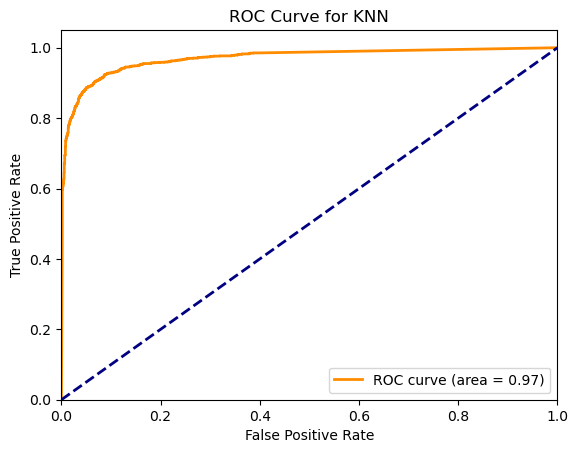

Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      2257
           1       0.94      0.85      0.89      1423

    accuracy                           0.92      3680
   macro avg       0.93      0.91      0.91      3680
weighted avg       0.92      0.92      0.92      3680



/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 969, in fit
    super().fit(
  File "/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 265, in fit
    check_scalar(
  

Balanced accuracy score for Decision Tree is :  [0.93424748 0.91808068 0.91568055 0.89754456 0.90876231]


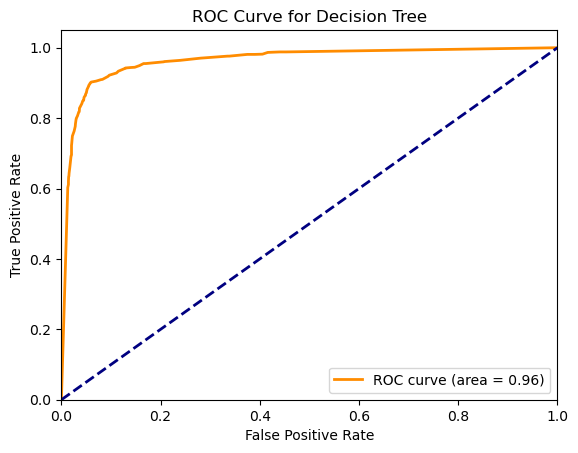

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      2257
           1       0.91      0.89      0.90      1423

    accuracy                           0.92      3680
   macro avg       0.92      0.92      0.92      3680
weighted avg       0.92      0.92      0.92      3680



/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/l

Balanced accuracy score for Logistic Regression is :  [0.92372117 0.91217178 0.93461314 0.9189206  0.90277951]


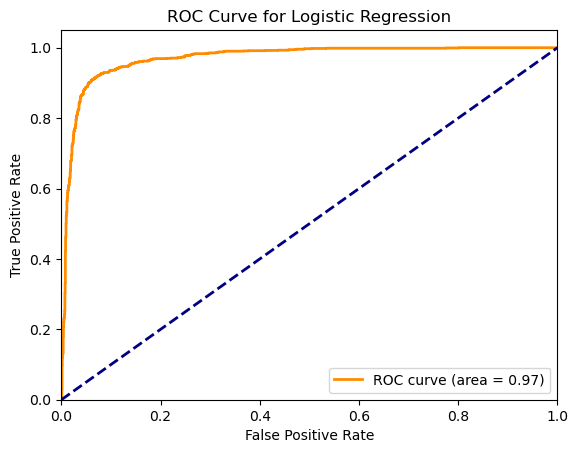

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      2257
           1       0.92      0.88      0.90      1423

    accuracy                           0.93      3680
   macro avg       0.93      0.92      0.92      3680
weighted avg       0.93      0.93      0.93      3680

Balanced accuracy score for SVM is :  [0.93313883 0.92094371 0.93332166 0.91343637 0.91998006]


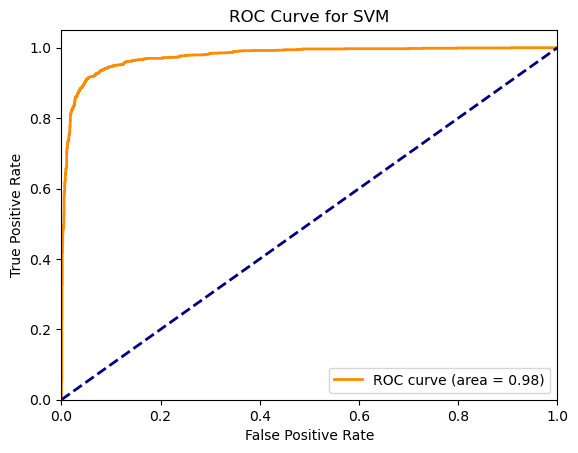

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      2257
           1       0.93      0.89      0.91      1423

    accuracy                           0.93      3680
   macro avg       0.93      0.92      0.93      3680
weighted avg       0.93      0.93      0.93      3680

Balanced accuracy score for Random Forest is :  [0.94985413 0.9398763  0.94634535 0.91937243 0.93632369]


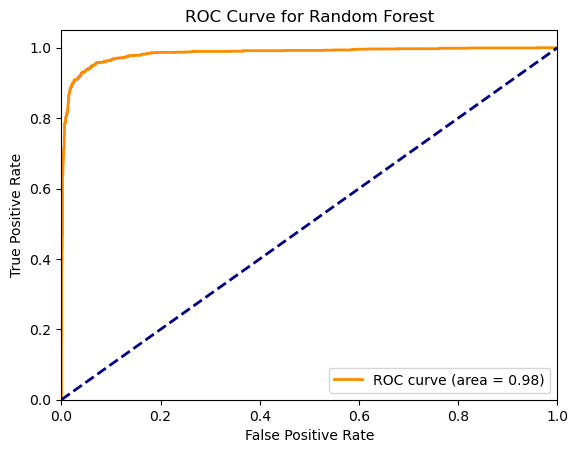

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      2257
           1       0.95      0.91      0.93      1423

    accuracy                           0.95      3680
   macro avg       0.95      0.94      0.94      3680
weighted avg       0.95      0.95      0.95      3680

Balanced accuracy score for Gradient Boosting is :  [0.94652818 0.94273933 0.95576302 0.9352175  0.93496822]


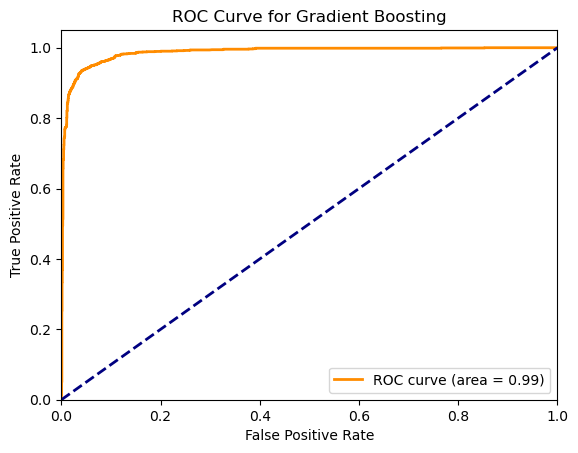

Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2257
           1       0.94      0.92      0.93      1423

    accuracy                           0.95      3680
   macro avg       0.95      0.94      0.95      3680
weighted avg       0.95      0.95      0.95      3680

Balanced accuracy score for XGBoost is :  [0.95687167 0.94338507 0.96278057 0.93189892 0.94729216]


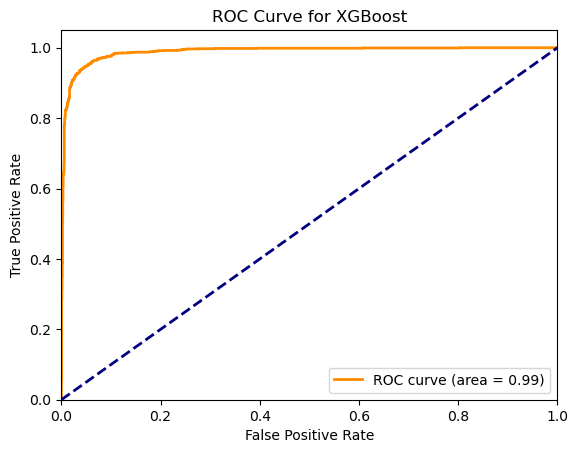

Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      2257
           1       0.94      0.93      0.94      1423

    accuracy                           0.95      3680
   macro avg       0.95      0.95      0.95      3680
weighted avg       0.95      0.95      0.95      3680

Balanced accuracy score for AdaBoost is :  [0.95096277 0.93747617 0.94892831 0.92686651 0.93189892]


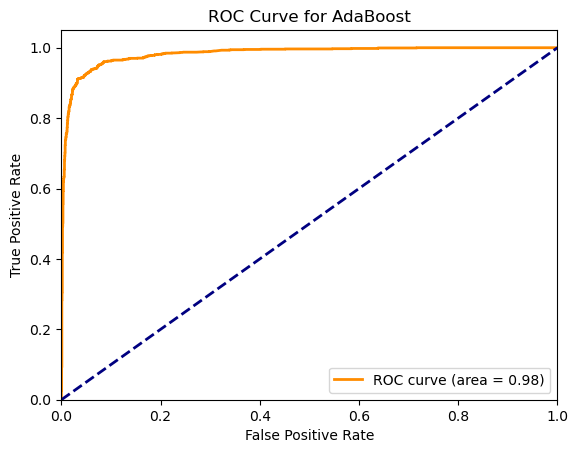

Classification Report for AdaBoost:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2257
           1       0.94      0.91      0.93      1423

    accuracy                           0.95      3680
   macro avg       0.95      0.94      0.94      3680
weighted avg       0.95      0.95      0.95      3680

Best Model: XGBoost
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}


In [19]:
for model_name, (model, param_grid) in models.items():
    inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    grid_search = GridSearchCV(model, param_grid, cv=inner_cv, scoring='roc_auc', n_jobs=-1)
    
    # Fit the GridSearchCV object
    grid_search.fit(X_train, y_train)
    
    balaced_accuracy_score = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=outer_cv, scoring='balanced_accuracy')
    
    print(f'Balanced accuracy score for {model_name} is : ', balaced_accuracy_score)
    # Calculate ROC curve
    y_pred = cross_val_predict(grid_search.best_estimator_, X_train, y_train, cv=outer_cv, method='predict_proba')[:, 1]
    y_true_binary = (y_train == 1).astype(int)
    fpr, tpr, _ = roc_curve(y_true_binary, y_pred)
    
    # Calculate AUC
    roc_auc = auc(fpr, tpr)
    
    # Calculate lift ratio
    #lift = calculate_lift(y_true_binary, y_pred)
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()
    
    # Print lift ratio
    #print(f'Lift Ratio for {name}: {lift:.2f}')
    
    # Print classification report
    y_pred_binary = (y_pred >= 0.5).astype(int)
    print(f'Classification Report for {model_name}:\n', classification_report(y_true_binary, y_pred_binary))
    model_performance_normalized[model_name] = balanced_accuracy_score
    
    if np.mean(balaced_accuracy_score) > best_balanced_accuracy:
        best_balanced_accuracy = np.mean(balaced_accuracy_score)
        best_model_name = model_name
        best_model = grid_search.best_estimator_
        best_hyperparams = grid_search.best_params_
        
# Print the best model and its hyperparameters
print(f'Best Model: {best_model_name}')
print(f'Best Hyperparameters: {best_hyperparams}')

The best model after cross validations on the normalized data is XGBoost and it has an accuracy of 95% here the balanced accuracy also is shown to be 95%. We can also see that the f1 score for spam email class is 0.94 while f1 score for non spam class is 96%. Precision and recall for spam email class is found to be 96% and the same for non spam email class is 94% and 93%. The ROC and AUC curve for each model with best hyper parameters are drawn above. 
XGBoost has an auc score of 0.99 which is very close to the perfect score, meaning the ability to classify the positive class above the negative classes for this model is very very high. Also one thing to high light here is that random forest, gradient boost, ada boost shown a normal accuracy of 0.95. The cross validation results shows that the balanced accuracy is slightly less than the XG boost however it's still good enough. Out of all the models KNN found to be performing slightly lesser than the others with an accuracy of 0.95. We used balanced accuracy here so that the class imbalance is taken care of.

Best parameters out of all the parameters we tried here is found to be {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}. 

# Out of Sample Prediction

In [28]:
xgb_best_model = XGBClassifier(

    n_estimators=100,             # Number of boosting rounds
    max_depth=5,                  # Maximum depth of trees
    learning_rate=0.2            # Learning rate
)


In [29]:
xgb_best_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [32]:
y_prob = xgb_best_model.predict_proba(X_test)[:, 1] 

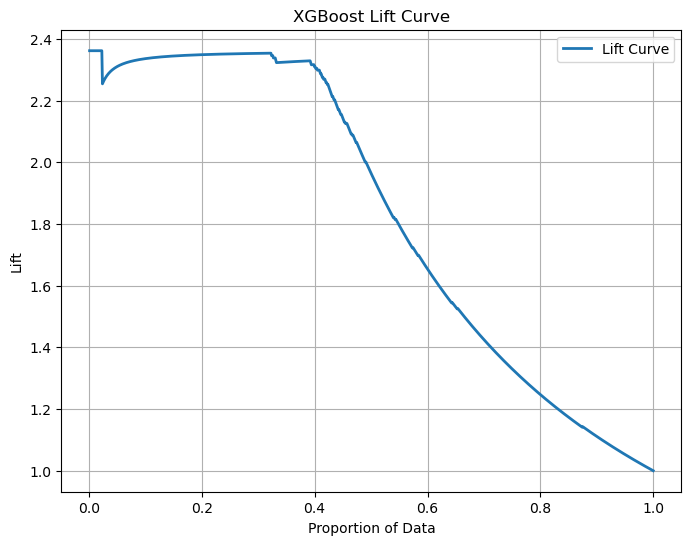

In [37]:
sorted_indices = np.argsort(y_prob)[::-1]
y_probs_sorted = y_prob[sorted_indices]
y_true_sorted = y_test.iloc[sorted_indices]

# Initialize lists to store lift curve values
lift_values = []
proportion_values = []
total_positives = np.sum(y_true_sorted)
total_samples = len(y_true_sorted)

# Calculate lift values for various proportions of data
for i in range(1, total_samples + 1):
    proportion = i / total_samples
    subset_positives = np.sum(y_true_sorted[:i])
    lift = (subset_positives / total_positives) / proportion
    lift_values.append(lift)
    proportion_values.append(proportion)

# Plot the lift curve
plt.figure(figsize=(8, 6))
plt.plot(proportion_values, lift_values, lw=2, label='Lift Curve')
plt.xlabel('Proportion of Data')
plt.ylabel('Lift')
plt.title('XGBoost Lift Curve')
plt.legend()
plt.grid()
plt.show()


We see that for the first 40% of data the best model is able to predict spam emails 2.3 times better than a random classifier, if we look at 60% of the proportion of data our model is performin 1.5 times better than the random classifier here.

# Finding the Best Model With Mis Classification Cost

I believe classifying a normal email as spam email should be penalized more. If I don't see the important emails as spam email I would not see it and it might cost me a lot hence my misclassification cost function would look like the below

In [14]:
from sklearn.metrics import confusion_matrix
def custom_misclassification_cost(y_true, y_pred):
    # Compute the confusion matrix
    print(confusion_matrix(y_true, y_pred).ravel())
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Calculate the custom cost based on your specified costs
    custom_cost = 10 * fp + fn  # Type I error cost is 10, Type II error cost is 1
    
    return custom_cost

In [17]:
least_mis_classification_cost = 99999;

Balanced accuracy score for KNN is :  [0.92150387 0.91706928 0.90904034 0.90553721 0.88370934]
[2180   77  215 1208]
mis classification cost for KNN is :  985


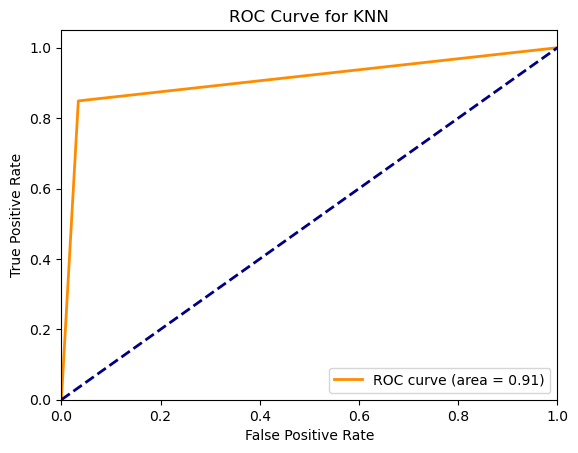

Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      2257
           1       0.94      0.85      0.89      1423

    accuracy                           0.92      3680
   macro avg       0.93      0.91      0.91      3680
weighted avg       0.92      0.92      0.92      3680



/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 969, in fit
    super().fit(
  File "/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 265, in fit
    check_scalar(
  Fi

Balanced accuracy score for Decision Tree is :  [0.92113821 0.9179951  0.89472517 0.88632681 0.88894429]
[2167   90  222 1201]
mis classification cost for Decision Tree is :  1122


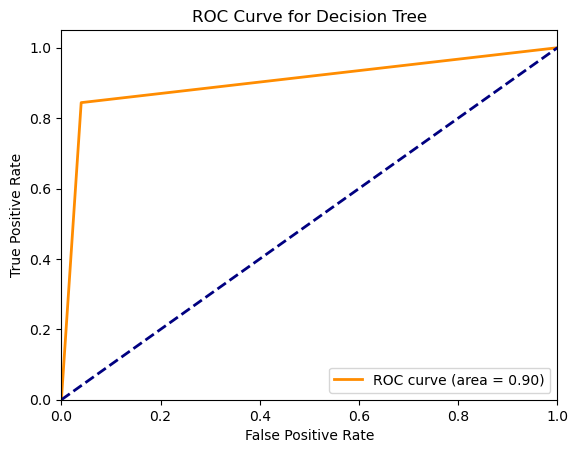

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      2257
           1       0.93      0.84      0.89      1423

    accuracy                           0.92      3680
   macro avg       0.92      0.90      0.91      3680
weighted avg       0.92      0.92      0.91      3680



/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aswin/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/l

Balanced accuracy score for Logistic Regression is :  [0.92372117 0.91217178 0.93461314 0.9189206  0.90277951]
[2149  108  164 1259]
mis classification cost for Logistic Regression is :  1244


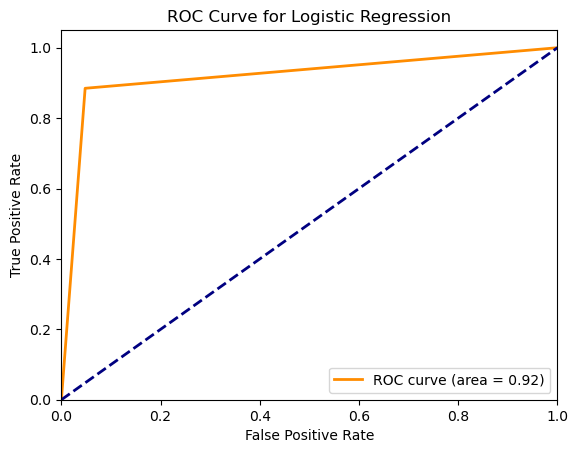

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      2257
           1       0.92      0.88      0.90      1423

    accuracy                           0.93      3680
   macro avg       0.93      0.92      0.92      3680
weighted avg       0.93      0.93      0.93      3680

Balanced accuracy score for SVM is :  [0.93313883 0.92094371 0.93332166 0.91343637 0.91998006]
[2159   98  154 1269]
mis classification cost for SVM is :  1134


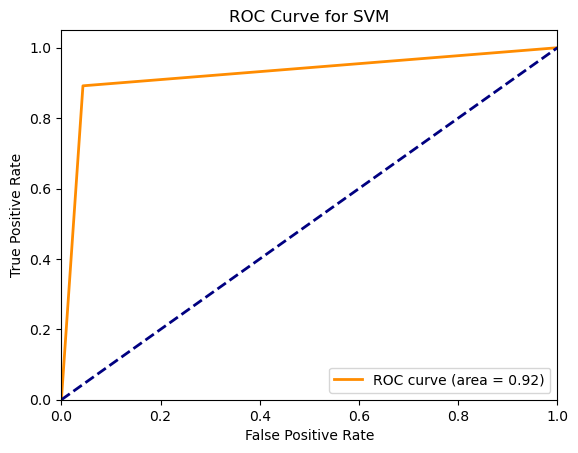

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      2257
           1       0.93      0.89      0.91      1423

    accuracy                           0.93      3680
   macro avg       0.93      0.92      0.93      3680
weighted avg       0.93      0.93      0.93      3680

Balanced accuracy score for Random Forest is :  [0.95382581 0.93812191 0.9447738  0.92223919 0.93984482]
[2186   71  126 1297]
mis classification cost for Random Forest is :  836


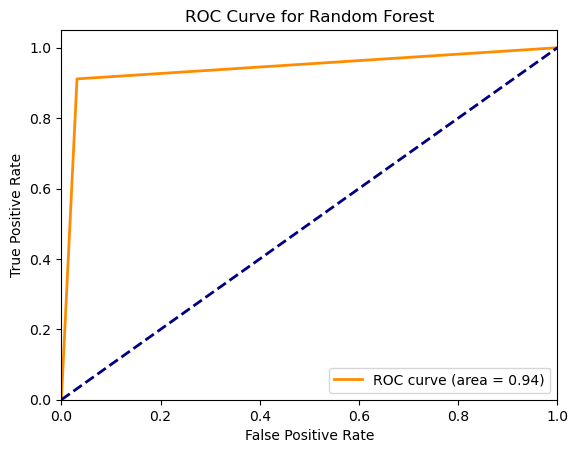

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2257
           1       0.95      0.91      0.93      1423

    accuracy                           0.95      3680
   macro avg       0.95      0.94      0.94      3680
weighted avg       0.95      0.95      0.95      3680

Balanced accuracy score for Gradient Boosting is :  [0.94828257 0.94273933 0.95576302 0.9352175  0.93496822]
[2173   84  106 1317]
mis classification cost for Gradient Boosting is :  946


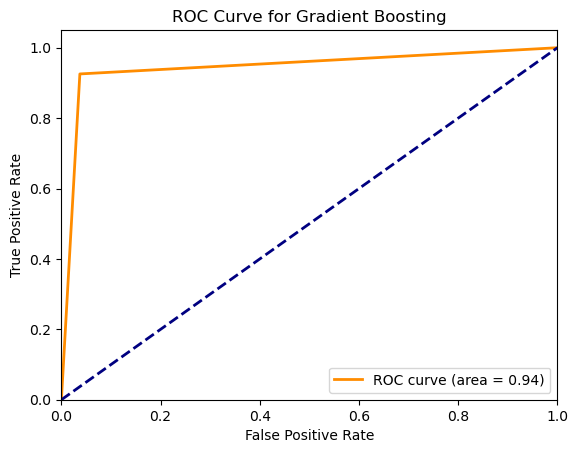

Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      2257
           1       0.94      0.93      0.93      1423

    accuracy                           0.95      3680
   macro avg       0.95      0.94      0.95      3680
weighted avg       0.95      0.95      0.95      3680

Balanced accuracy score for XGBoost is :  [0.95687167 0.94338507 0.96278057 0.93189892 0.94729216]
[2175   82   95 1328]
mis classification cost for XGBoost is :  915


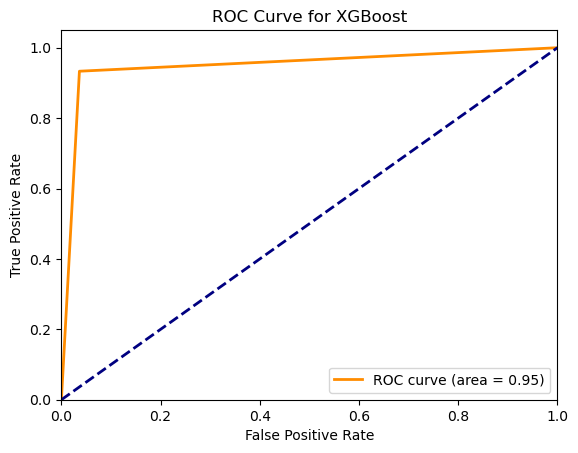

Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      2257
           1       0.94      0.93      0.94      1423

    accuracy                           0.95      3680
   macro avg       0.95      0.95      0.95      3680
weighted avg       0.95      0.95      0.95      3680

Balanced accuracy score for AdaBoost is :  [0.95096277 0.93747617 0.94892831 0.92686651 0.93189892]
[2181   76  125 1298]
mis classification cost for AdaBoost is :  885


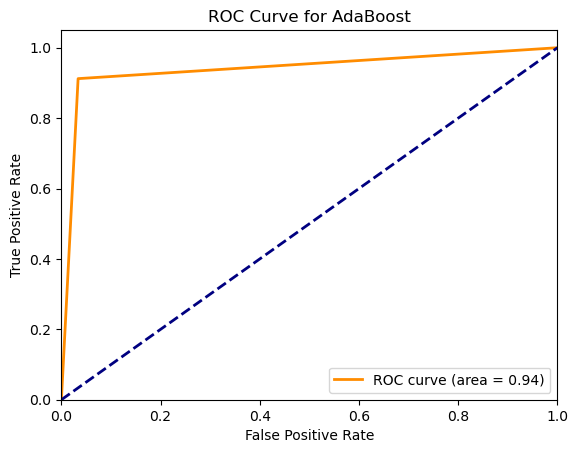

Classification Report for AdaBoost:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2257
           1       0.94      0.91      0.93      1423

    accuracy                           0.95      3680
   macro avg       0.95      0.94      0.94      3680
weighted avg       0.95      0.95      0.95      3680

Best Model: Random Forest
Best Hyperparameters: {'max_depth': 20, 'n_estimators': 200}


In [18]:
for model_name, (model, param_grid) in models.items():
    inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    grid_search = GridSearchCV(model, param_grid, cv=inner_cv, scoring='roc_auc', n_jobs=-1)
    
    # Fit the GridSearchCV object
    grid_search.fit(X_train, y_train)
    
    balaced_accuracy_score = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=outer_cv, scoring='balanced_accuracy')
    
    print(f'Balanced accuracy score for {model_name} is : ', balaced_accuracy_score)
    # Calculate ROC curve
    y_pred = cross_val_predict(grid_search.best_estimator_, X_train, y_train, cv=outer_cv, method='predict')
    y_true_binary = (y_train == 1).astype(int)
    fpr, tpr, _ = roc_curve(y_true_binary, y_pred)
    

    mis_classification_cost = custom_misclassification_cost(y_true_binary, y_pred)
    print(f'mis classification cost for {model_name} is : ', mis_classification_cost)
    # Calculate AUC
    roc_auc = auc(fpr, tpr)
    
    # Calculate lift ratio
    #lift = calculate_lift(y_true_binary, y_pred)
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()
    
    # Print lift ratio
    #print(f'Lift Ratio for {name}: {lift:.2f}')
    
    # Print classification report
    y_pred_binary = (y_pred >= 0.5).astype(int)
    print(f'Classification Report for {model_name}:\n', classification_report(y_true_binary, y_pred_binary))
    
    if mis_classification_cost < least_mis_classification_cost:
        least_mis_classification_cost = mis_classification_cost
        best_model_name = model_name
        best_model = grid_search.best_estimator_
        best_hyperparams = grid_search.best_params_
        
# Print the best model and its hyperparameters
print(f'Best Model: {best_model_name}')
print(f'Best Hyperparameters: {best_hyperparams}')

Random Forest is found to be the best model with respect to the misclassfication cost. The least mis classfication cost found to be 836. the parameters found out through the inner loop hyper paramter tuning is {'learning_rate': 0.1, 'n_estimators': 200}. Adaboost also performing relatively goo with a mis classification cost XG Boost is showing a mis classification cost of 915 and gradient boost has 946.

The change in model is due to the reason that we are selecting the model based on the mis classifcation cost here. Random forest has relatively small reduction in the balanced accuracy compared to XGB as part of the first modelling we have done. however if we are trying to penalise type I error more (about 10 times compared to type 2 error), its better to choose random forest as it's showing signifcantly less cost.

# Out Of Sample Cost Calculation For Best Model

In [20]:
rf_best = RandomForestClassifier(n_estimators=200, max_depth=20)

In [21]:
n_folds = 5

In [22]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [23]:
false_positive_cost = 10
false_negative_cost = 1

In [24]:
y_pred = cross_val_predict(rf_best,X=X_test, y=y_test, cv=skf)

In [25]:
confusion = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[515  16]
 [ 28 362]]


In [26]:
misclass_cost = (
        confusion[0, 1] * false_positive_cost +
        confusion[1, 0] * false_negative_cost
    )


In [27]:
print(f'Misclassification cost for out of sample is {misclass_cost}')

Misclassification cost for out of sample is 188


Mis classification cost in the out of sample unseen data found to be 188. This check was done just to see how the performance is

Misclassification Cost:

In the context of misclassification costs, I assigned a higher cost (10) to classifying a normal email as spam and a lower cost (1) for the reverse misclassification. The goal here was to minimize the financial impact of misclassifications.
Under this criterion, the Random Forest model emerged as the best-performing model. This indicates that the Random Forest model is the most cost-effective solution for our specific application.

Balanced Accuracy:

On the other hand, when evaluating models using balanced accuracy, which considers the trade-off between true positives and true negatives, the XGBoost (XGB) model achieved a remarkable balanced accuracy of 95. This suggests that XGBoost is the best model for achieving a balanced performance across both classes, spam and non-spam.
The observed difference in model selection arises from the fact that these evaluation criteria focus on different aspects of model performance. While misclassification cost prioritizes the cost-effectiveness of classification, balanced accuracy emphasizes a balance between correctly identifying spam and non-spam emails.

This discrepancy might be attributed to the inherent trade-offs that exist between these two criteria. Misclassification cost aims to minimize the impact of certain types of errors, but it may lead to less balance in overall accuracy. In contrast, balanced accuracy strives for fairness and balance in the model's performance, but it may not account for varying misclassification costs.

